In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installatio

In [ ]:
!pip install keras

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tarfile
import os

Preprocessing Data

In [ ]:
user_data = pd.read_csv('/content/drive/MyDrive/Bangkit/training_data.csv', sep = ',', nrows=11000)
user_data['user_id'] = [f"UD{i:04d}" for i in range(1, len(user_data) + 1)]
user_data

,user_id,remaining_calories,remaining_carbo,remaining_protein,remaining_fat,remaining_cholesterol
0,UD0001,1914,284.966,95.150,40.815,38
1,UD0002,1144,29.964,228.968,12.264,249
2,UD0003,1406,212.416,80.322,45.339,145
3,UD0004,2405,246.631,161.243,64.255,283
4,UD0005,835,86.521,39.853,15.224,178
...,...,...,...,...,...,...
10995,UD10996,227,12.435,6.177,20.411,-24
10996,UD10997,551,10.568,13.612,49.273,-64
10997,UD10998,576,13.650,115.410,6.604,114
10998,UD10999,67,6.803,2.841,1.708,37


In [ ]:
food_data = pd.read_csv('/content/drive/MyDrive/Bangkit/food_data.csv', sep = ',')
food_data

,No.,food_id,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Cholesterol
0,1,FD0001,Oatmeal,380,9.93,0.940,69.10,13.70,0
1,2,FD0002,Udon,105,0.63,0.090,21.60,2.60,0
2,3,FD0003,Macaroni and Spaghetti,165,1.56,0.210,32.00,5.40,0
3,4,FD0004,Nonglutinous White Rice,168,0.57,0.100,37.10,2.50,0
4,5,FD0005,Glutinous White Rice,202,0.79,0.150,43.90,3.50,0
...,...,...,...,...,...,...,...,...,...
145,146,FD0146,Gado-Gado,132,7.41,1.386,10.90,7.14,78
146,147,FD0147,Siomay,138,2.29,0.585,16.30,12.26,43
147,148,FD0148,Chicken Gulai,168,12.40,7.584,3.33,11.94,35
148,149,FD0149,Grilled Ribs,254,19.00,7.613,0.94,19.10,68


In [ ]:
pair_data = pd.read_csv('/content/drive/MyDrive/Bangkit/user_food_pairs (1).csv', sep = ',')
pair_data

,user_id,food_id,user_features,food_features,label
0,UD0001,FD0017,"[-491, -11.502, -69.53, -24.765, 282]","[294, 0.0, 79.7, 0.2, 0]",0
1,UD0001,FD0089,"[-491, -11.502, -69.53, -24.765, 282]","[356, 3.56, 0.8, 77.1, 180]",0
2,UD0001,FD0045,"[-491, -11.502, -69.53, -24.765, 282]","[34, 0.17, 8.5, 0.9, 0]",0
3,UD0002,FD0007,"[814, 17.856, 120.062, 42.164, -12]","[179, 0.57, 39.4, 2.7, 0]",0
4,UD0002,FD0016,"[814, 17.856, 120.062, 42.164, -12]","[357, 0.97, 82.8, 6.6, 0]",0
...,...,...,...,...,...
70324,UD10999,FD0072,"[-462, -11.862, -85.931, -29.845, 173]","[32, 0.0, 7.8, 0.8, 0]",0
70325,UD10999,FD0030,"[-462, -11.862, -85.931, -29.845, 173]","[39, 6.09, 2.2, 0.8, 0]",0
70326,UD11000,FD0056,"[1106, 22.082, 163.538, 55.245, 122]","[20, 0.0, 5.0, 0.2, 0]",0
70327,UD11000,FD0068,"[1106, 22.082, 163.538, 55.245, 122]","[39, 0.18, 9.4, 1.3, 0]",0


In [ ]:
class DataLoader:
    def __init__(self, user_file, food_file, pair_file):
        self.user_file = user_file
        self.food_file = food_file
        self.pair_file = pair_file

    def load_data(self):
        # Load datasets
        user_data = self.user_file
        food_data = self.food_file
        pair_data = self.pair_file
        return user_data, food_data, pair_data

    def prepare_tf_dataset(self, pair_data, user_data, food_data):
        def parse_features(feature_str):
            feature_str = feature_str.strip('[]')
            return list(map(float, feature_str.split(',')))

        user_features = pair_data['user_features'].apply(parse_features).to_list()
        food_features = pair_data['food_features'].apply(parse_features).to_list()

        user_features = tf.convert_to_tensor(user_features, dtype=tf.float32)
        food_features = tf.convert_to_tensor(food_features, dtype=tf.float32)
        labels = tf.convert_to_tensor(pair_data['label'].values, dtype=tf.float32)

        inputs = {
            "remaining_nutrition": user_features,
            "food_nutrition": food_features
        }

        tf_dataset = tf.data.Dataset.from_tensor_slices((inputs, labels))
        return tf_dataset.shuffle(buffer_size=10000).batch(256).cache().prefetch(tf.data.AUTOTUNE)

Model Recommendation

In [ ]:
class FoodRecommendationModel(tf.keras.Model):
    def __init__(self, embedding_dim=64):
        super().__init__()
        self.query_model = tf.keras.Sequential([
            layers.Dense(embedding_dim, activation="relu", input_shape=(5,)),
            layers.BatchNormalization(),
            layers.Dropout(0.15),
        ])

        self.candidate_model = tf.keras.Sequential([
            layers.Dense(embedding_dim, activation="relu", input_shape=(5,)),
            layers.BatchNormalization(),
            layers.Dropout(0.15),
        ])

    def call(self, inputs, training=False):
        user_features = inputs["remaining_nutrition"]
        food_features = inputs["food_nutrition"]

        user_embeddings = self.query_model(user_features)
        food_embeddings = self.candidate_model(food_features)

        return user_embeddings, food_embeddings

    def compute_loss(self, user_embeddings, food_embeddings, labels):
        similarity = tf.reduce_sum(user_embeddings * food_embeddings, axis=1)
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels, similarity))
        return loss

    def train_step(self, data):
        inputs, labels = data
        with tf.GradientTape() as tape:
            user_embeddings, food_embeddings = self.call(inputs, training=True)
            loss = self.compute_loss(user_embeddings, food_embeddings, labels)

        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        return {"loss": loss}


Recommendation Function

In [ ]:
class InferenceModule:
    def __init__(self, model, food_data):
        self.model = model
        self.food_data = food_data
        self.food_features = tf.convert_to_tensor(
            self.food_data[['Caloric Value', 'Fat', 'Carbohydrates', 'Protein', 'Cholesterol']].values,
            dtype=tf.float32
        )

    def recommend_food(self, user_nutrition, k=5):
        user_nutrition = tf.convert_to_tensor(user_nutrition, dtype=tf.float32)

        if len(user_nutrition.shape) == 1:
            user_nutrition = tf.expand_dims(user_nutrition, axis=0)

        user_embedding = self.model.query_model(user_nutrition)
        food_embeddings = self.model.candidate_model(self.food_features)

        dot_product = tf.linalg.matmul(user_embedding, food_embeddings, transpose_b=True)
        user_norm = tf.norm(user_embedding, axis=1, keepdims=True)
        food_norm = tf.norm(food_embeddings, axis=1, keepdims=True)
        similarity_scores = dot_product / (user_norm * tf.transpose(food_norm) + 1e-9)

        top_k_indices = tf.argsort(similarity_scores, direction="DESCENDING")[0][:k]
        recommended_food_names = self.food_data['food'].iloc[top_k_indices.numpy()]

        return recommended_food_names

Training Model

In [ ]:
class TrainingPipeline:
    def __init__(self, model, train_data, val_data=None, learning_rate=0.01):
        self.model = model
        self.train_data = train_data
        self.val_data = val_data
        self.optimizer = tf.keras.optimizers.Adagrad(learning_rate)
        self.precision_metric = tf.keras.metrics.Precision(name="precision")
        self.recall_metric = tf.keras.metrics.Recall(name="recall")
        self.auc_metric = tf.keras.metrics.AUC(name="auc")

    def train(self, epochs=10):
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}")
            for step, (inputs, labels) in enumerate(self.train_data):
                with tf.GradientTape() as tape:
                    user_embeddings, food_embeddings = self.model(inputs, training=True)
                    loss = self.model.compute_loss(user_embeddings, food_embeddings, labels)

                grads = tape.gradient(loss, self.model.trainable_variables)
                self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))

                # Update metrics
                predictions = tf.sigmoid(tf.reduce_sum(user_embeddings * food_embeddings, axis=1))
                self.precision_metric.update_state(labels, predictions)
                self.recall_metric.update_state(labels, predictions)
                self.auc_metric.update_state(labels, predictions)

            # Log epoch metrics
            precision = self.precision_metric.result().numpy()
            recall = self.recall_metric.result().numpy()
            auc = self.auc_metric.result().numpy()
            print(f"Loss: {loss:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {auc:.4f}")


            self.precision_metric.reset_states()
            self.recall_metric.reset_states()
            self.auc_metric.reset_states()

if __name__ == "__main__":
    user_file = user_data
    food_file = food_data
    pair_file = pair_data

    data_loader = DataLoader(user_file, food_file, pair_file)
    user_data, food_data, pair_data = data_loader.load_data()

    train_dataset = data_loader.prepare_tf_dataset(pair_data, user_data, food_data)

    model = FoodRecommendationModel()

    trainer = TrainingPipeline(model, train_dataset)
    trainer.train(epochs=10)

    inference = InferenceModule(model, food_data)

Epoch 1/10
Loss: 1.1150, Precision: 0.7208, Recall: 0.8287, AUC: 0.7866
Epoch 2/10
Loss: 0.6064, Precision: 0.7828, Recall: 0.9328, AUC: 0.8934
Epoch 3/10
Loss: 0.6363, Precision: 0.8132, Recall: 0.9530, AUC: 0.9215
Epoch 4/10
Loss: 0.4171, Precision: 0.8380, Recall: 0.9590, AUC: 0.9363
Epoch 5/10
Loss: 0.3118, Precision: 0.8575, Recall: 0.9557, AUC: 0.9437
Epoch 6/10
Loss: 0.3510, Precision: 0.8736, Recall: 0.9540, AUC: 0.9500
Epoch 7/10
Loss: 0.3464, Precision: 0.8837, Recall: 0.9546, AUC: 0.9538
Epoch 8/10
Loss: 0.4103, Precision: 0.8917, Recall: 0.9587, AUC: 0.9579
Epoch 9/10
Loss: 0.2566, Precision: 0.8956, Recall: 0.9555, AUC: 0.9588
Epoch 10/10
Loss: 0.4067, Precision: 0.8999, Recall: 0.9582, AUC: 0.9602


Visualization Perfomance Model

In [ ]:
class TrainingPipeline:
    def __init__(self, model, train_data, val_data=None, learning_rate=0.001):
        self.model = model
        self.train_data = train_data
        self.val_data = val_data
        self.optimizer = tf.keras.optimizers.Adam(learning_rate)
        self.precision_metric = tf.keras.metrics.Precision(name="precision")
        self.recall_metric = tf.keras.metrics.Recall(name="recall")
        self.auc_metric = tf.keras.metrics.AUC(name="auc")

    def train(self, epochs=10):
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}")
            for step, (inputs, labels) in enumerate(self.train_data):
                with tf.GradientTape() as tape:
                    user_embeddings, food_embeddings = self.model(inputs, training=True)
                    loss = self.model.compute_loss(user_embeddings, food_embeddings, labels)

                grads = tape.gradient(loss, self.model.trainable_variables)
                self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))


                predictions = tf.sigmoid(tf.reduce_sum(user_embeddings * food_embeddings, axis=1))
                self.precision_metric.update_state(labels, predictions)
                self.recall_metric.update_state(labels, predictions)
                self.auc_metric.update_state(labels, predictions)

            precision = self.precision_metric.result().numpy()
            recall = self.recall_metric.result().numpy()
            auc = self.auc_metric.result().numpy()
            print(f"Loss: {loss:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {auc:.4f}")

            self.precision_metric.reset_states()
            self.recall_metric.reset_states()
            self.auc_metric.reset_states()

In [ ]:
class TrainingPipeline:
    def __init__(self, model, train_data, val_data=None, learning_rate=0.001):
        self.model = model
        self.train_data = train_data
        self.val_data = val_data
        self.optimizer = tf.keras.optimizers.Adam(learning_rate)
        self.precision_metric = tf.keras.metrics.Precision(name="precision")
        self.recall_metric = tf.keras.metrics.Recall(name="recall")
        self.auc_metric = tf.keras.metrics.AUC(name="auc")

        # Initialize lists to store metrics
        self.loss_history = []
        self.precision_history = []
        self.recall_history = []
        self.auc_history = []

    def train(self, epochs=10):
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}")
            for step, (inputs, labels) in enumerate(self.train_data):
                with tf.GradientTape() as tape:
                    user_embeddings, food_embeddings = self.model(inputs, training=True)
                    loss = self.model.compute_loss(user_embeddings, food_embeddings, labels)

                grads = tape.gradient(loss, self.model.trainable_variables)
                self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))

                predictions = tf.sigmoid(tf.reduce_sum(user_embeddings * food_embeddings, axis=1))
                self.precision_metric.update_state(labels, predictions)
                self.recall_metric.update_state(labels, predictions)
                self.auc_metric.update_state(labels, predictions)

            precision = self.precision_metric.result().numpy()
            recall = self.recall_metric.result().numpy()
            auc = self.auc_metric.result().numpy()
            print(f"Loss: {loss:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {auc:.4f}")

            self.loss_history.append(loss.numpy())
            self.precision_history.append(precision)
            self.recall_history.append(recall)
            self.auc_history.append(auc)

            self.precision_metric.reset_states()
            self.recall_metric.reset_states()
            self.auc_metric.reset_states()

In [ ]:
import matplotlib.pyplot as plt

def plot_combined_metrics(precision_history, recall_history, auc_history):
    epochs = range(1, len(precision_history) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, precision_history, label="Precision", marker="o")
    plt.plot(epochs, recall_history, label="Recall", marker="s")
    plt.plot(epochs, auc_history, label="AUC", marker="^")

    plt.title("Evaluasi Model: Metric Precision, Recall, and AUC")
    plt.xlabel("Epochs")
    plt.ylabel("Metrics")
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 1/10
Loss: 1.1414, Precision: 0.7221, Recall: 0.8249, AUC: 0.7858
Epoch 2/10
Loss: 0.8131, Precision: 0.8311, Recall: 0.9427, AUC: 0.9236
Epoch 3/10
Loss: 0.1807, Precision: 0.8866, Recall: 0.9501, AUC: 0.9517
Epoch 4/10
Loss: 0.2274, Precision: 0.9040, Recall: 0.9582, AUC: 0.9612
Epoch 5/10
Loss: 0.1758, Precision: 0.9111, Recall: 0.9612, AUC: 0.9647
Epoch 6/10
Loss: 0.1557, Precision: 0.9143, Recall: 0.9649, AUC: 0.9672
Epoch 7/10
Loss: 0.1531, Precision: 0.9187, Recall: 0.9678, AUC: 0.9699
Epoch 8/10
Loss: 0.2091, Precision: 0.9225, Recall: 0.9700, AUC: 0.9721
Epoch 9/10
Loss: 0.1383, Precision: 0.9217, Recall: 0.9719, AUC: 0.9726
Epoch 10/10
Loss: 0.1247, Precision: 0.9249, Recall: 0.9730, AUC: 0.9735


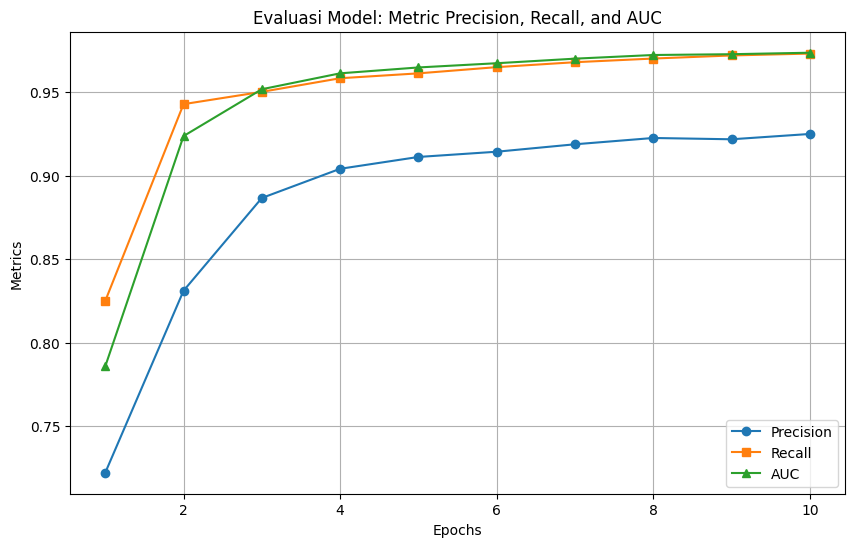

In [ ]:
if __name__ == "__main__":
    user_file = user_data
    food_file = food_data
    pair_file = pair_data

    data_loader = DataLoader(user_file, food_file, pair_file)
    user_data, food_data, pair_data = data_loader.load_data()

    train_dataset = data_loader.prepare_tf_dataset(pair_data, user_data, food_data)

    model = FoodRecommendationModel()

    trainer = TrainingPipeline(model, train_dataset)
    trainer.train(epochs=10)

    plot_combined_metrics(trainer.precision_history, trainer.recall_history, trainer.auc_history)

    inference = InferenceModule(model, food_data)

Save Model

In [ ]:
model.save('food_recommendation_model2')

In [ ]:
import shutil

# Convert to tar.gz
shutil.make_archive("/content/my_model", 'gztar', "saved_model")

'/content/my_model.tar.gz'

Try Recommendation Model

In [ ]:
# Try 1
new_user_nutrition = tf.constant([10, 10, 20, 5.125, 30], dtype=tf.float32)
recommendations = inference.recommend_food(user_nutrition=new_user_nutrition, k=5)
print("Recommended food names:\n", recommendations)

Recommended food names:
 1                       Udon
2     Macaroni and Spaghetti
17          Boiled Red Beans
60                     Plums
50                    Lemons
Name: food, dtype: object


In [ ]:
# Try 2
new_user_nutrition = tf.constant([-86, -12.961, -4.378, -1.45, 20], dtype=tf.float32)
recommendations = inference.recommend_food(user_nutrition=new_user_nutrition, k=5)
print("Recommended food names:\n", recommendations)

Recommended food names:
 52        Yellow Kiwifruit
107    Fruit Flavored Milk
50                  Lemons
78                  Apples
43                Apricots
Name: food, dtype: object


In [ ]:
# Try 3
new_user_nutrition = tf.constant([4, 10.389, 86.307, 30.808, 13], dtype=tf.float32)
recommendations = inference.recommend_food(user_nutrition=new_user_nutrition, k=5)
print("Recommended food names:\n", recommendations)

Recommended food names:
 21                         Raw Almond
22     Roasted and Salted Cashew Nuts
131                         Green Tea
106                  Coffee with Milk
42                           Avocados
Name: food, dtype: object


In [ ]:
# Try 4
new_user_nutrition = tf.constant([1, 5, 2, 1, 0], dtype=tf.float32)
recommendations = inference.recommend_food(user_nutrition=new_user_nutrition, k=5)
print("Recommended food names:\n", recommendations)

Recommended food names:
 107    Fruit Flavored Milk
124           Milk Pudding
30       Boiled Sweet Corn
105           Low-Fat Milk
61                  Durian
Name: food, dtype: object
